In [3]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
x_train = np.load("/content/drive/MyDrive/Project/data.npy")
y_train = np.load("/content/drive/MyDrive/Project/data2.npy")
x_test = np.load("/content/drive/MyDrive/Project/data3.npy")
y_test = np.load("/content/drive/MyDrive/Project/data4.npy")
x_val = np.load("/content/drive/MyDrive/Project/data5.npy")
y_val = np.load("/content/drive/MyDrive/Project/data6.npy")

In [5]:
# Import TensorFlow
import tensorflow as tf

model =tf.keras.Sequential()

In [6]:
model.add(tf.keras.layers.Conv2D(64,(3,3),1,activation="relu", input_shape=(24,32,3))) #16 katmanlı, 3*3 boyutlu, 1 ise stride yani kaç piksel ilerleyeceği, relu aktivasyon fonksiyonuna sahip bu sayede non-lineer özellik kazanıyor
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,(3,3),1,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,(3,3),1,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation="relu")) # 256 nörona sahip bir katman
model.add(tf.keras.layers.Dense(1,activation="softmax")) # İşlemler sonucunda ortaya çıkan output, 0 ya da 1 olmalı; sigmoid aktivasyon fonksiyonu kullanıyor

In [7]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [8]:
results= model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1181/1181 [==============================] - 15s 4ms/step - loss: nan - accuracy: 0.0221 - val_loss: nan - val_accuracy: 0.0172
Epoch 2/50
1181/1181 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0221 - val_loss: nan - val_accuracy: 0.0172
Epoch 3/50
1181/1181 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0221 - val_loss: nan - val_accuracy: 0.0172
Epoch 4/50
1181/1181 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0221 - val_loss: nan - val_accuracy: 0.0172
Epoch 5/50
1181/1181 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0221 - val_loss: nan - val_accuracy: 0.0172
Epoch 6/50
1181/1181 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0221 - val_loss: nan - val_accuracy: 0.0172
Epoch 7/50
1181/1181 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0221 - val_loss: nan - val_accuracy: 0.0172
Epoch 8/50
1181/1181 [===========

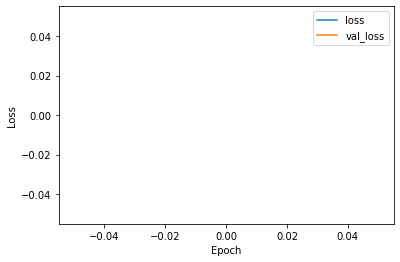

In [9]:
import matplotlib.pyplot as plt
# Plot the the training loss
plt.plot(results.history["loss"], label ="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label ="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

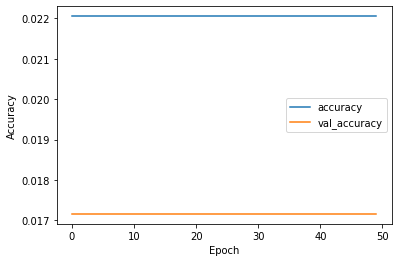

In [10]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label ="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label ="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [11]:
model.evaluate(x_test, y_test)

148/148 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0182


[nan, 0.01821262203156948]

In [12]:
prediction_result=model.predict(x_test[1].reshape(1,24,32,3))
prediction_result

array([[nan]], dtype=float32)